<a href="https://colab.research.google.com/github/Ashish4544/used-car-price-prediction/blob/main/Car_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('used_cars.csv')
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [8]:
df.isna().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [9]:
df['milage'] = df['milage'].str.replace(' mi.', '', regex=False).str.replace(',', '').astype(float)

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['milage']

,milage
0,51000.0
1,34742.0
2,22372.0
3,88900.0
4,9835.0
...,...
4004,714.0
4005,10900.0
4006,2116.0
4007,33000.0


In [10]:
num_col=df[['model_year','milage','price']]
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_year  4009 non-null   int64  
 1   milage      4009 non-null   float64
 2   price       4009 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 94.1 KB


In [11]:
df.rename(columns={'milage': 'miles_driven'}, inplace=True)
df['car_age'] = 2025 - df['model_year']

Text(0.5, 1.02, 'Pair Plot of Numerical Columns')

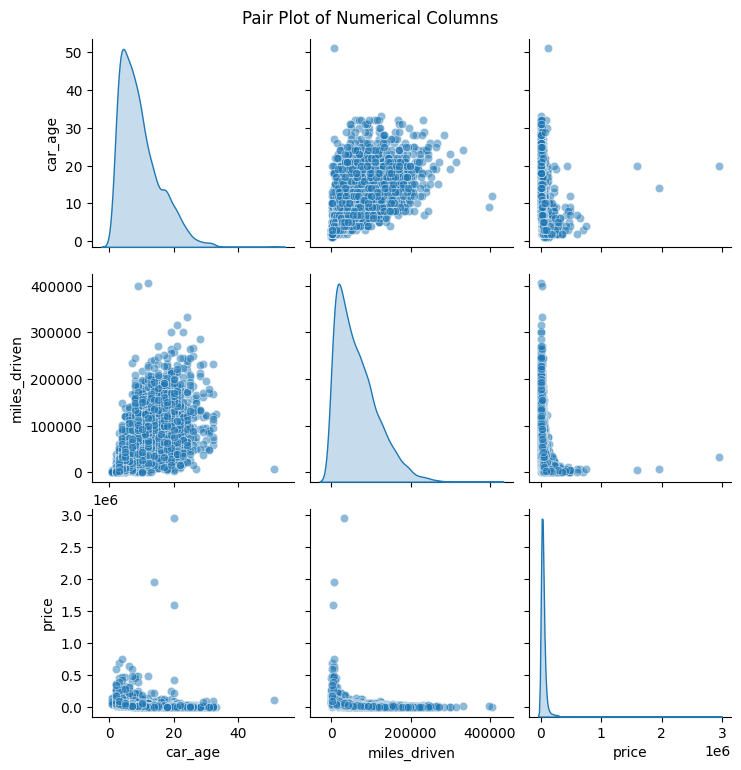

In [12]:
sns.pairplot(df[['car_age','miles_driven','price']], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)

In [13]:
df = df[df['price'] < 500000]
df = df[df['miles_driven'] < 400000]

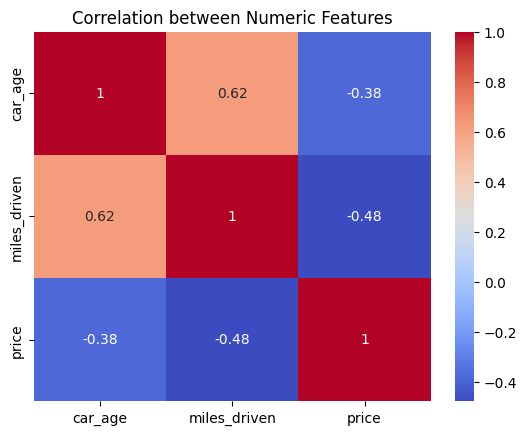

In [14]:
sns.heatmap(df[['car_age', 'miles_driven', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numeric Features")
plt.show()

In [15]:
df["brand"].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [16]:
# Accident history (1 if accident reported, else 0)
df['has_accident'] = df['accident'].apply(
    lambda x: 1 if 'accident' in str(x).lower() else 0
)

# Clean title (1 if 'Yes', else 0)
df['clean_title'] = df['clean_title'].apply(
    lambda x: 1 if str(x).lower() == 'yes' else 0
)

In [17]:
df['has_accident'].value_counts(), df['clean_title'].value_counts()

(has_accident
 0    3015
 1     985
 Name: count, dtype: int64,
 clean_title
 1    3404
 0     596
 Name: count, dtype: int64)

In [18]:
# luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Lexus', 'Porsche', 'Land Rover', 'Jaguar', 'INFINITI', 'Genesis', 'Tesla', 'Bentley', 'Maserati', 'Aston Martin', 'Ferrari', 'Lamborghini','McLaren', 'Rolls-Royce', 'Bugatti', 'Pagani', 'Koenigsegg', 'Alfa Romeo', 'Lotus', 'Polestar', 'Lucid Motors', 'Rimac','Cadillac','Maybach','Lexus', 'MINI']

# df['brand_category'] = df['brand'].apply(
#     lambda x: 'Luxury' if x in luxury_brands else 'Standard'
# )
# df['brand_category'].value_counts()
# df['brand_category'].isna().sum()

In [19]:
# df[df['brand'] == 'McLaren']['brand_category'].unique()

In [20]:
brand_target_means = df.groupby('brand')['price'].mean()
df['brand_target_encoded'] = df['brand'].map(brand_target_means)

# Calculate target means for 'model'
model_target_means = df.groupby('model')['price'].mean()
df['model_target_encoded'] = df['model'].map(model_target_means)

In [21]:
import pandas as pd
import numpy as np
import re

# Load your DataFrame (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')

# ---- SAFE HP EXTRACTION (NO UNINTENDED CHANGES) ----
# Step 1: Extract HP reliably without altering other columns
df['horsepower'] = (
    df['engine']
    .str.extract(r'(\d+\.?\d*)\s?HP', flags=re.IGNORECASE, expand=False)  # Returns Series
    .astype(float)  # Convert to float
)

# Step 2: Fill missing HP (median by brand OR global median)
brand_median_hp = df.groupby('brand')['horsepower'].transform('median')
df['horsepower'] = df['horsepower'].fillna(brand_median_hp).fillna(df['horsepower'].median())

# Step 3: Verify changes (optional)
print(df[['brand', 'model', 'engine', 'horsepower']].head())

      brand                            model  \
0      Ford  Utility Police Interceptor Base   
1   Hyundai                     Palisade SEL   
2     Lexus                    RX 350 RX 350   
3  INFINITI                 Q50 Hybrid Sport   
4      Audi        Q3 45 S line Premium Plus   

                                              engine  horsepower  
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...       300.0  
1                               3.8L V6 24V GDI DOHC       240.0  
2                                     3.5 Liter DOHC       301.0  
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...       354.0  
4                         2.0L I4 16V GDI DOHC Turbo       333.0  


<Axes: >

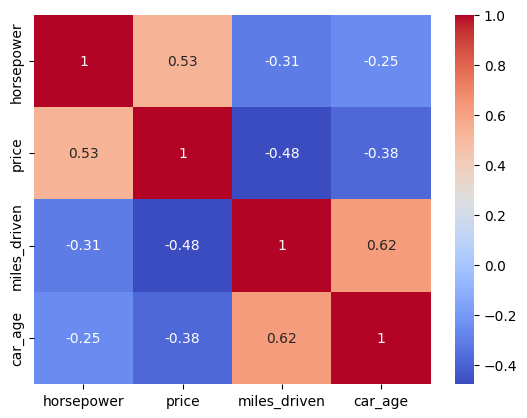

In [22]:
sns.heatmap(df[['horsepower', 'price','miles_driven','car_age']].corr(), annot=True, cmap='coolwarm')

In [23]:
df['ext_col'].describe()

,ext_col
count,4000
unique,318
top,Black
freq,904


In [24]:
def simplify_color(color):
    color = str(color).lower()
    if 'black' in color:
        return 'black'
    elif 'white' in color:
        return 'white'
    elif 'gray' in color or 'grey' in color:
        return 'gray'
    elif 'silver' in color:
        return 'silver'
    elif 'blue' in color:
        return 'blue'
    elif 'red' in color:
        return 'red'
    elif 'green' in color:
        return 'green'
    elif 'beige' in color or 'brown' in color:
        return 'brown'
    elif 'yellow' in color or 'gold' in color:
        return 'yellow'
    elif 'orange' in color:
        return 'orange'
    elif 'purple' in color:
        return 'purple'
    else:
        return 'other'

df['ext_color_grouped'] = df['ext_col'].apply(simplify_color)
df['ext_color_grouped'].value_counts()

,count
ext_color_grouped,
black,1015
white,921
gray,545
silver,420
blue,394
red,310
other,111
brown,83
green,80


 check pt1

In [25]:
color_dummies = pd.get_dummies(df['ext_color_grouped'], prefix='ext_color_grouped')
color_dummies

,ext_color_grouped_black,ext_color_grouped_blue,ext_color_grouped_brown,ext_color_grouped_gray,ext_color_grouped_green,ext_color_grouped_orange,ext_color_grouped_other,ext_color_grouped_purple,ext_color_grouped_red,ext_color_grouped_silver,ext_color_grouped_white,ext_color_grouped_yellow
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,False,False,False,False,False,False,True,False,False,False,False,False
4005,True,False,False,False,False,False,False,False,False,False,False,False
4006,True,False,False,False,False,False,False,False,False,False,False,False
4007,False,True,False,False,False,False,False,False,False,False,False,False


In [26]:
color_dummies = color_dummies.astype(int)
color_dummies

,ext_color_grouped_black,ext_color_grouped_blue,ext_color_grouped_brown,ext_color_grouped_gray,ext_color_grouped_green,ext_color_grouped_orange,ext_color_grouped_other,ext_color_grouped_purple,ext_color_grouped_red,ext_color_grouped_silver,ext_color_grouped_white,ext_color_grouped_yellow
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,0,0,0,0,0,0,1,0,0,0,0,0
4005,1,0,0,0,0,0,0,0,0,0,0,0
4006,1,0,0,0,0,0,0,0,0,0,0,0
4007,0,1,0,0,0,0,0,0,0,0,0,0


In [27]:
df = pd.concat([df, color_dummies], axis=1)
df.drop(columns=['ext_col', 'ext_color_grouped'], inplace=True)


In [28]:
df.columns

Index(['brand', 'model', 'model_year', 'miles_driven', 'fuel_type', 'engine',
       'transmission', 'int_col', 'accident', 'clean_title', 'price',
       'car_age', 'has_accident', 'brand_target_encoded',
       'model_target_encoded', 'horsepower', 'ext_color_grouped_black',
       'ext_color_grouped_blue', 'ext_color_grouped_brown',
       'ext_color_grouped_gray', 'ext_color_grouped_green',
       'ext_color_grouped_orange', 'ext_color_grouped_other',
       'ext_color_grouped_purple', 'ext_color_grouped_red',
       'ext_color_grouped_silver', 'ext_color_grouped_white',
       'ext_color_grouped_yellow'],
      dtype='object')

In [29]:
drop_cols = ['model', 'brand', 'engine', 'accident','int_col','model_year']
df.drop(columns=drop_cols, inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

for col in ['transmission', 'fuel_type']:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])

In [31]:
df.drop(columns=['transmission', 'fuel_type'], inplace=True)

In [32]:
df.dtypes

,0
miles_driven,float64
clean_title,int64
price,float64
car_age,int64
has_accident,int64
brand_target_encoded,float64
model_target_encoded,float64
horsepower,float64
ext_color_grouped_black,int64
ext_color_grouped_blue,int64


In [33]:
df.isna().sum()

,0
miles_driven,0
clean_title,0
price,0
car_age,0
has_accident,0
brand_target_encoded,0
model_target_encoded,0
horsepower,0
ext_color_grouped_black,0
ext_color_grouped_blue,0


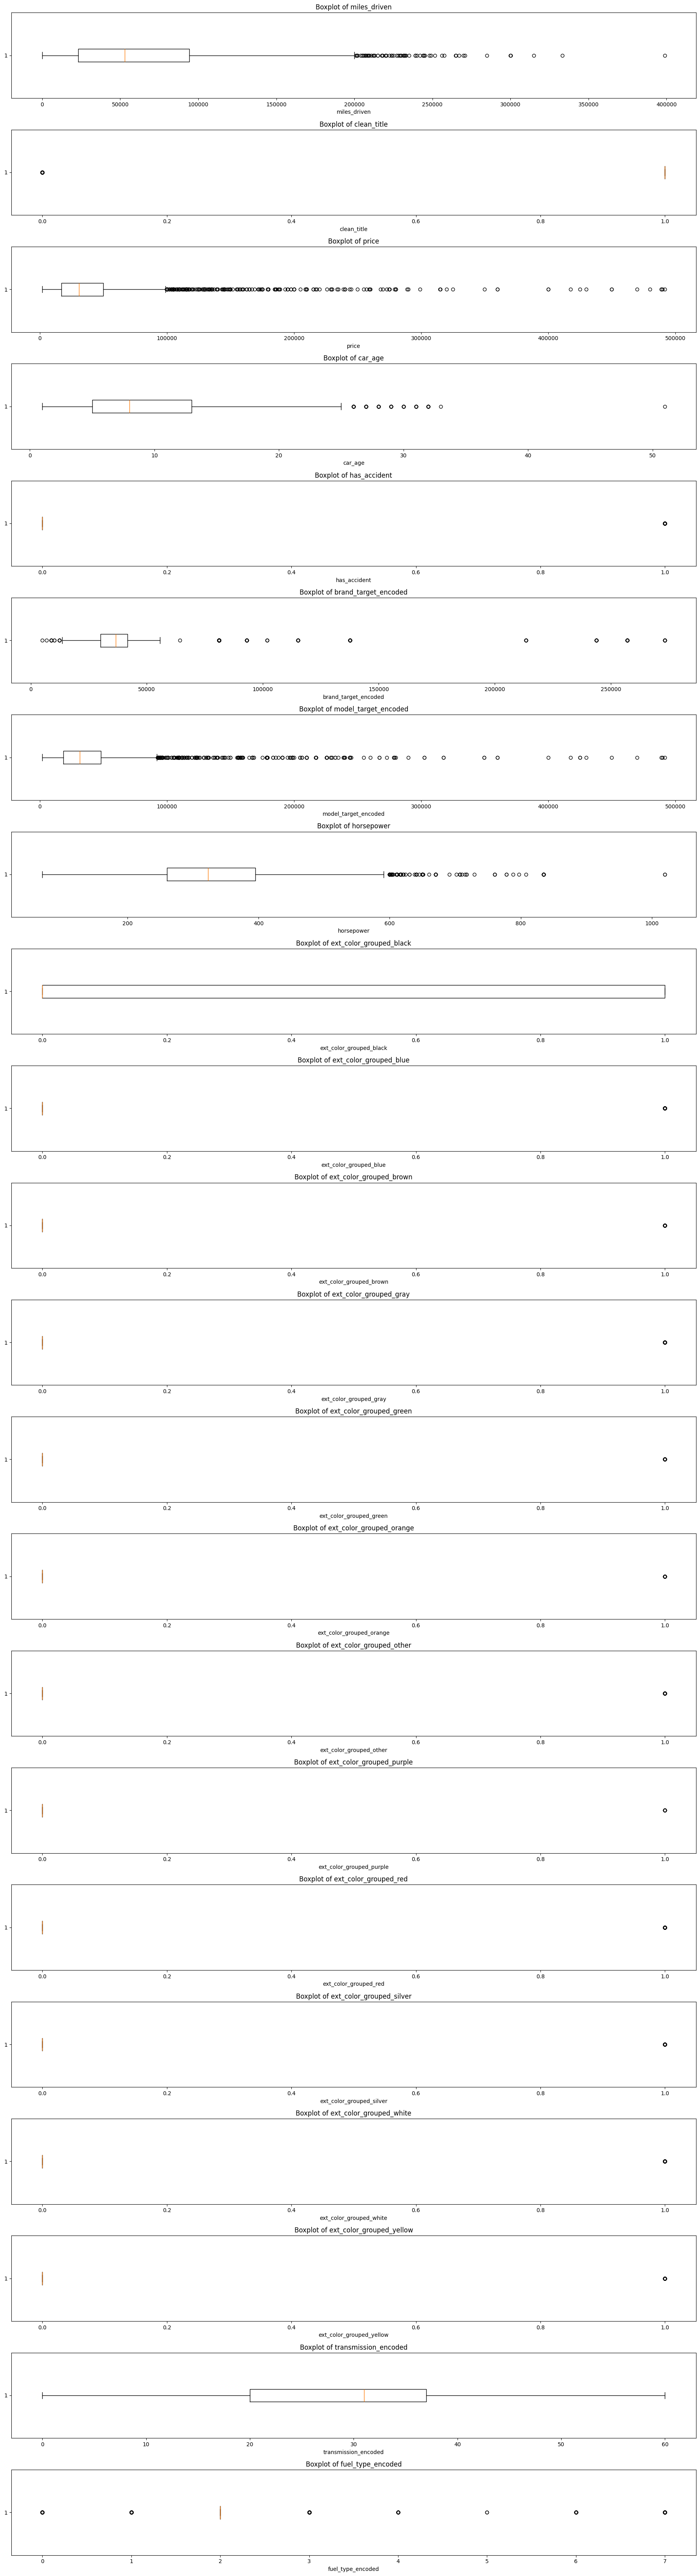

In [34]:
import matplotlib.pyplot as plt

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(18, 3 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [35]:
## Outlier Removal
for col in ['price', 'miles_driven','car_age','horsepower']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [36]:
# Using IQR method to count outliers for each numeric column
outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = outliers

outlier_counts

{'miles_driven': np.int64(0),
 'clean_title': np.int64(596),
 'price': np.int64(0),
 'car_age': np.int64(0),
 'has_accident': np.int64(985),
 'brand_target_encoded': np.int64(328),
 'model_target_encoded': np.int64(289),
 'horsepower': np.int64(0),
 'ext_color_grouped_black': np.int64(0),
 'ext_color_grouped_blue': np.int64(394),
 'ext_color_grouped_brown': np.int64(83),
 'ext_color_grouped_gray': np.int64(545),
 'ext_color_grouped_green': np.int64(80),
 'ext_color_grouped_orange': np.int64(37),
 'ext_color_grouped_other': np.int64(111),
 'ext_color_grouped_purple': np.int64(12),
 'ext_color_grouped_red': np.int64(310),
 'ext_color_grouped_silver': np.int64(420),
 'ext_color_grouped_white': np.int64(921),
 'ext_color_grouped_yellow': np.int64(72),
 'transmission_encoded': np.int64(0),
 'fuel_type_encoded': np.int64(699)}

 Split and Scaling

In [37]:
X = df.drop(columns=['price'])
Y= df['price']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()

In [39]:
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

 Train model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

In [41]:
#train the models
linear_reg.fit(x_train_scaled, Y_train)
random_forest_reg.fit(x_train_scaled, Y_train)
gradient_boosting_reg.fit(x_train_scaled, Y_train)

GradientBoostingRegressor(random_state=42)

In [42]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
# Define parameter grids for each model
param_grid_linear = {}  # No hyperparameters to tune for Linear Regression

param_grid_rf = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [None, 10,15,20],
}

param_grid_gb = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.01,0.05, 0.1, 1],
    'max_depth': [3, 5, 7],
}

In [43]:
grid_search_linear = GridSearchCV(linear_reg, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_rf = GridSearchCV(random_forest_reg, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_gb = GridSearchCV(gradient_boosting_reg, param_grid_gb, cv=5, scoring='neg_mean_squared_error')

In [44]:
grid_search_linear.fit(x_train_scaled, Y_train)
grid_search_rf.fit(x_train_scaled, Y_train)
grid_search_gb.fit(x_train_scaled, Y_train)
# Get the best parameters and scores
best_params_linear = grid_search_linear.best_params_
best_params_rf = grid_search_rf.best_params_
best_params_gb = grid_search_gb.best_params_

In [45]:
best_params_rf, best_params_gb

({'max_depth': 20, 'n_estimators': 300},
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300})

In [46]:
#Evaluate the models on the test set
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluate_model(model, X_test, Y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    return mse, r2, mae
# Evaluate Linear Regression
mse_linear, r2_linear, mae_linear = evaluate_model(linear_reg, x_test_scaled, Y_test)

In [47]:
#print all the evaluation metrics
print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}, MAE: {mae_linear}")
# Evaluate Random Forest
mse_rf, r2_rf, mae_rf = evaluate_model(random_forest_reg, x_test_scaled, Y_test)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}, MAE: {mae_rf}")
# Evaluate Gradient Boosting
mse_gb, r2_gb, mae_gb = evaluate_model(gradient_boosting_reg, x_test_scaled, Y_test)
print(f"Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}, MAE: {mae_gb}")

Linear Regression - MSE: 141359386.8258503, R2: 0.7894080008359782, MAE: 8297.171930504279
Random Forest - MSE: 40654172.20484656, R2: 0.9394349141488253, MAE: 4058.8609125000007
Gradient Boosting - MSE: 40431058.74450808, R2: 0.9397673003504644, MAE: 4239.431602978931
